In [1]:
import xlrd
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
path = "q1.xlsx"

In [3]:
wrk = xlrd.open_workbook(path)
data = wrk.sheet_by_index(0)

In [4]:
data.nrows

98

In [5]:
data.ncols

2

# Batch LMS

In [6]:
X = []
Y = []

In [7]:
for i in range(1, 98):
    l = []
    l.append(1.0)
    l.append(data.cell_value(i, 0))
    Y.append(data.cell_value(i, 1))
    X.append(l)

In [8]:
m = len(X)

In [9]:
lx0 = []
lx1 = []

In [10]:
for i in range(m):
    lx0.append(X[i][0])
    lx1.append(X[i][1])

In [11]:
def matrixmulti(theta, lx0, lx1, m):
    
    hx = []
    lx00 = []
    lx11 = []
    
    for i in range(m):
        lx00.append(lx0[i]*theta[0])
        lx11.append(lx1[i]*theta[1])
        hx.append(lx00[i] + lx11[i])
        
    return hx

In [12]:
def calcost(theta, lx0, lx1, m, Y):
    
    sub1 = []
    hx = matrixmulti(theta, lx0, lx1, m)
    for i in range(m):
        sub1.append(hx[i] - Y[i])
        
    suml = 0
    for i in range(m):
        suml = suml + sub1[i]**2
        
    cost1 = (0.5)*suml
    
    return cost1

In [13]:
ep = 0

In [14]:
alpha = 0.0001

In [15]:
theta = [0.0, 0.0]
theta

[0.0, 0.0]

In [16]:
costl = []

In [17]:
cost = 1.0

In [18]:
start = time.time()
while ep<100000:
    
    sub = []
    hx = matrixmulti(theta, lx0, lx1, m)
    for i in range(m):
        sub.append(Y[i] - hx[i])

    sum0 = 0
    sum1 = 0
    for i in range(m):
        sum0 = sum0 + sub[i]*lx0[i]
        sum1 = sum1 + sub[i]*lx1[i]
        
    mul0 = alpha*sum0
    mul1 = alpha*sum1
    
    theta[0] = theta[0] + mul0
    theta[1] = theta[1] + mul1
    
    cost = calcost(theta, lx0, lx1, m, Y)
    costl.append(cost)
    ep = ep + 1


end = time.time()
print("time taken to converge = ", end - start)

time taken to converge =  15.076980829238892


In [19]:
theta

[-3.915084242730683, 1.1930336441895806]

# Least Squares Closed Form 

In [20]:
xt = [lx0, lx1]

In [21]:
xtn = np.array(xt)

In [22]:
xn = xtn.transpose()

In [23]:
xtn.shape

(2, 97)

In [24]:
xn.shape

(97, 2)

In [25]:
xtx = np.dot(xtn, xn)

In [26]:
xtx.shape

(2, 2)

In [27]:
xtxinv = np.linalg.inv(xtx)

In [28]:
xtxinv

array([[ 0.05776319, -0.00574517],
       [-0.00574517,  0.00069556]])

In [29]:
matx = np.dot(xtxinv, xtn)

In [30]:
matx.shape

(2, 97)

In [31]:
Yn = np.array(Y)

In [32]:
Yn1 = np.reshape(Yn, (97, 1))

In [33]:
Yn1.shape

(97, 1)

In [34]:
thetac1 = np.dot(matx, Yn1)

In [35]:
thetac = []
for i in range(2):
    thetac.append(thetac1[i][0])
thetac

[-3.9150842427308175, 1.1930336441895943]

# Stochastic LMS

In [36]:
import pandas as pd

In [37]:
dfx = pd.read_excel(path)

In [38]:
dfx.head()

,"Population in 10,000's",Profit In Lakhs(Rs)
0,6.2101,17.6920
1,5.6277,9.2302
2,8.6186,13.7620
3,7.1032,11.9540
4,5.9598,6.9233


In [39]:
dfxs = dfx.sample(frac = 1)

In [40]:
dfxs.head()

,"Population in 10,000's",Profit In Lakhs(Rs)
38,12.9360,10.2170
69,20.4410,21.0920
92,5.9707,7.3029
72,6.1062,1.3784
53,7.7031,5.0981


In [41]:
lx1s = []

In [42]:
for p in dfxs["Population in 10,000's"]:
    lx1s.append(p)

In [43]:
Ys = []

In [44]:
for pr in dfxs["Profit In Lakhs(Rs)"]:
    Ys.append(pr)

In [45]:
len(lx1s)

97

In [46]:
len(Ys)

97

In [53]:
eps = 0

In [54]:
alphas = 0.0001

In [55]:
thetas = [0.0, 0.0]
thetas

[0.0, 0.0]

In [56]:
costs = 0

In [57]:
costls = []

In [58]:
start = time.time()
while eps<2000:
    
    for i in range(m):
        hxi = thetas[0] + thetas[1]*lx1s[i]
        thetas[0] = thetas[0] + alphas*(Ys[i] - hxi)*lx0[i]
        thetas[1] = thetas[1] + alphas*(Ys[i] - hxi)*lx1s[i]
        costs = calcost(thetas, lx0, lx1s, m, Ys)
        costls.append(costs)
        
    eps = eps + 1
    
end = time.time()
print("time taken to converge = ", end - start)

time taken to converge =  13.483229875564575


In [59]:
thetas

[-3.7863263206052604, 1.1797359612489877]

# Elastic Net

In [60]:
from sklearn.linear_model import ElasticNet

In [61]:
Xn = np.array(X)

In [62]:
Xn.shape

(97, 2)

In [63]:
Ynum = np.array(Y)

In [64]:
Ynum = np.reshape(Y, (97, 1))

In [65]:
Ynum.shape

(97, 1)

In [66]:
elnet = ElasticNet(alpha = 0.5) 
elnet.fit(Xn, Ynum) 

ElasticNet(alpha=0.5, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [67]:
thetaelnet = []

In [68]:
thetaelnet.append(elnet.intercept_[0])

In [69]:
thetaelnet.append(elnet.coef_[1])

In [70]:
thetaelnet

[-3.6146182812011443, 1.1566567389945928]

In [71]:
hxelnet = []
lx00elnet = []
lx11elnet = []

for i in range(m):
    lx00elnet.append(lx0[i]*thetaelnet[0])
    lx11elnet.append(lx1[i]*thetaelnet[1])
    hxelnet.append(lx00elnet[i] + lx11elnet[i])

In [72]:
#mean square error 
costelnet = calcost(thetaelnet, lx0, lx1, m, Y)

In [73]:
costelnet

435.21746000459973

# Lasso

In [74]:
from sklearn.linear_model import Lasso

In [75]:
lasso = Lasso(alpha = 1)

In [76]:
lasso.fit(Xn, Ynum)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [77]:
thetalasso = []

In [78]:
thetalasso.append(lasso.intercept_[0])

In [79]:
thetalasso.append(lasso.coef_[1])

In [80]:
thetalasso 

[-3.3578032325506904, 1.1255645759094752]

In [81]:
#mean square error 
costlasso = calcost(thetalasso, lx0, lx1, m, Y)

In [82]:
costlasso

437.5384732811781

# Ridge

In [83]:
from sklearn.linear_model import Ridge

In [84]:
ridge = Ridge(alpha = 1)

In [85]:
ridge.fit(Xn, Ynum)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [86]:
thetaridge = []

In [87]:
thetaridge.append(ridge.intercept_[0])

In [88]:
thetaridge.append(ridge.coef_[0][1])

In [89]:
thetaridge

[-3.908234831689253, 1.1922043975926349]

In [90]:
#mean square error 
costridge = calcost(thetaridge, lx0, lx1, m, Y)

In [91]:
costridge

434.2667177853122

# Graphs

In [92]:
#batch lms
theta

[-3.915084242730683, 1.1930336441895806]

In [93]:
#least square closed form
thetac

[-3.9150842427308175, 1.1930336441895943]

In [94]:
#we get same parameter values for batch lms and least square closed form

In [95]:
#stochastic lms
thetas

[-3.7863263206052604, 1.1797359612489877]

In [96]:
#elasticnet
thetaelnet

[-3.6146182812011443, 1.1566567389945928]

In [97]:
#lasso
thetalasso

[-3.3578032325506904, 1.1255645759094752]

In [98]:
#ridge
thetaridge

[-3.908234831689253, 1.1922043975926349]

In [99]:
#batch lms 
xxx = np.linspace(5, 24, 20)
yyy = theta[1]*xxx + theta[0]
#stochastic lms
xxxs = np.linspace(5, 24, 20)
yyys = thetas[1]*xxxs + thetas[0]
#least squares closed form 
xxxc = np.linspace(5, 24, 20)
yyyc = thetac[1]*xxxc + thetac[0]
#Elasticnet 
xxxelnet = np.linspace(5, 24, 20)
yyyelnet = thetaelnet[1]*xxxelnet + thetaelnet[0]
#Lasso 
xxxlasso = np.linspace(5, 24, 20)
yyylasso = thetalasso[1]*xxxlasso + thetalasso[0]
#Ridge 
xxxridge = np.linspace(5, 24, 20)
yyyridge = thetaridge[1]*xxxridge + thetaridge[0]

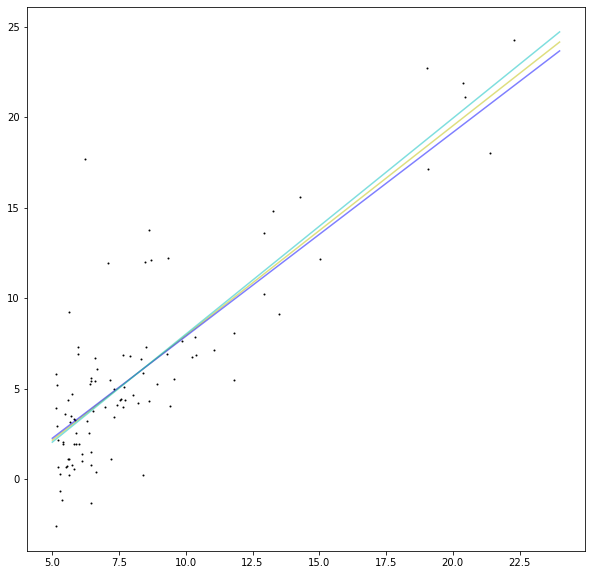

In [100]:
fig = plt.figure(figsize = (10, 10))
plt.scatter(lx1, Y, s = 1, c = "k")
plt.plot(xxxelnet, yyyelnet, "-y", alpha = 0.5)
plt.plot(xxxlasso, yyylasso, "-b", alpha = 0.5)
plt.plot(xxxridge, yyyridge, "-c", alpha = 0.5)
plt.show()

In [101]:
#batch lms cost
len(costl)

100000

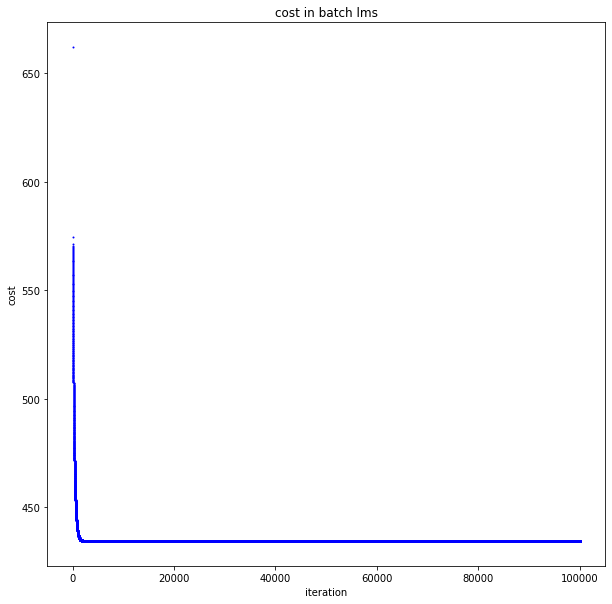

In [102]:
fig = plt.figure(figsize = (10, 10))
x_c = list(range(100000))
plt.scatter(x_c, costl, s = 1, c = "b")
plt.xlabel("iteration")
plt.ylabel("cost")
plt.title("cost in batch lms")
plt.show()

In [103]:
#stochastic lms cost
len(costls)

194000

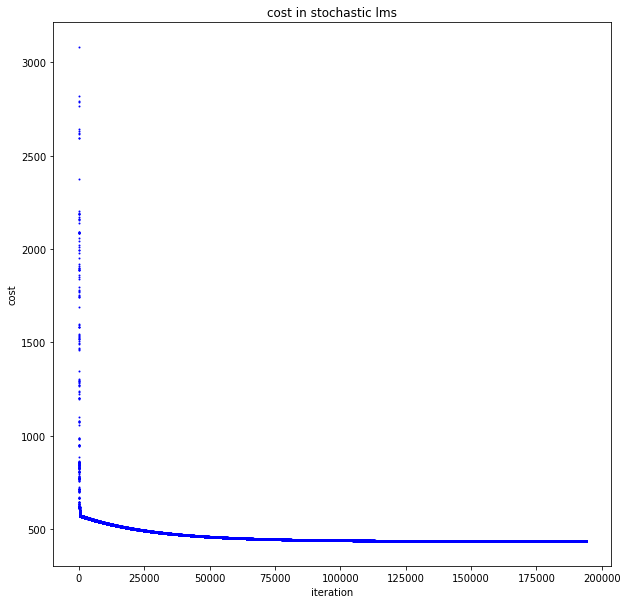

In [104]:
fig = plt.figure(figsize = (10, 10))
x_cs = list(range(194000))
plt.scatter(x_cs, costls, s = 1, c = "b")
plt.xlabel("iteration")
plt.ylabel("cost")
plt.title("cost in stochastic lms")
plt.show()